![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Análisis de sentimientos y técnicas de NLP

En este taller podrán poner en práctica sus conocimientos sobre las diferentes técnicas para el procesamiento de lenguaje natural. El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción sentimientos de viajeros en Twitter

En este taller se usará el conjunto de datos de sentimientos sobre distintas aerolíneas de EE.UU. provenientes de Twitter. Cada observación contiene si el sentimiento de los tweets es positivo, neutral o negativo teniendo en cuenta distintas variables como aerolínea y las razones de los sentimientos negativos (como "retraso en el vuelo" o "servicio grosero"). El objetivo es predecir el sentimiento asociado a cada tweet. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Lectura de la información de archivo .zip
tweets = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Tweets.zip', index_col=0)

# Visualización dataset
tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
# Impresión tamaño del cojunto de datos
tweets.shape

(14640, 14)

### Análisis descriptivo

In [5]:
# Cuenta de tweets por cada sentimiento
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [6]:
# Cuenta de tweets por cada aerolínea
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

<Axes: title={'center': 'Sentiminetos por aerolínea'}, xlabel='airline'>

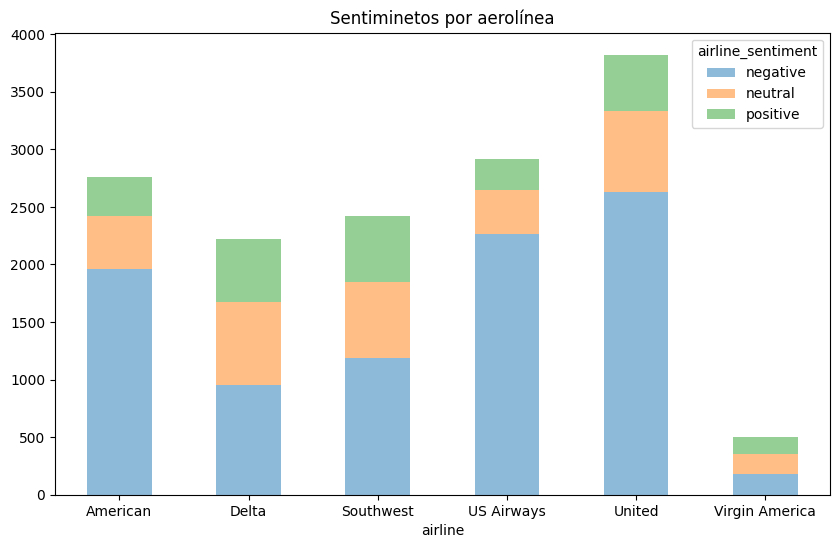

In [7]:
# Plot con cuenta de tweets por cada aerolínea y sentimiento
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiminetos por aerolínea")

### Liberias y Variables de interés y predicción

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [9]:
# Separación de variables predictoras (X) y de variable de interés (y)
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [10]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Uso de CountVectorizer

En la celda 1 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [11]:
# Celda 1
# Creación de matrices de documentos usando CountVectorizer a partir de X y usando n-gramas
vect_C = CountVectorizer()
X_dtm_C = vect_C.fit_transform(X_train)
X_dtm_C_t = vect_C.transform(X_test)


# Random Forest Regressor
param_grid = {
    "n_estimators": [5,10,15],
    "max_depth":[1,5,10],
    "max_features": [1,5,10],
}

clf = RandomForestClassifier()

grid_search = GridSearchCV(
    clf, param_grid, cv=5, scoring="accuracy", n_jobs=-1
)

grid_search.fit(X_dtm_C, y_train)

y_pred = grid_search.predict(X_dtm_C_t)

accuracy1 = accuracy_score(y_test, y_pred)

accuracy1

0.6384519867549668

### Punto 2 - Eliminación de Stopwords

En la celda 2 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **eliminen stopwords** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [12]:
# Celda 2
# Eliminación de stopwords al usar el parámetro 'stop_words' de la función CountVectorizer()
vect_no_stopw = CountVectorizer(stop_words='english')
X_dtm_C = vect_no_stopw.fit_transform(X_train)
X_dtm_C_t = vect_no_stopw.transform(X_test)


# Random Forest Regressor
param_grid = {
    "n_estimators": [5,10,15],
    "max_depth":[1,5,10],
    "max_features": [1,5,10],
}

clf = RandomForestClassifier()

grid_search = GridSearchCV(
    clf, param_grid, cv=5, scoring="accuracy", n_jobs=-1
)

grid_search.fit(X_dtm_C, y_train)

y_pred = grid_search.predict(X_dtm_C_t)

accuracy2 = accuracy_score(y_test, y_pred)

accuracy2

0.6384519867549668

### Punto 3 - Lematización con verbos

En la celda 3 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [14]:
# Celda 3
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
import nltk


In [16]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
#Función que lematiza los verbos
def split_into_lemmas_verbs(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word,pos='v') for word in words]

# CountVectorizer() con la parametrización de lemas
vect_lemmaw = CountVectorizer(analyzer=split_into_lemmas_verbs)
X_dtm_C3 = vect_lemmaw.fit_transform(X_train)
X_dtm_C3_t = vect_lemmaw.transform(X_test)


# Random Forest Regressor
param_grid3 = {
    "n_estimators": range(1,30),
    "max_depth":range(1,25),
    "max_features": range(1,15),
}

clf3 = RandomForestClassifier()

grid_search3 = GridSearchCV(
    clf3, param_grid3, cv=5, scoring="accuracy", n_jobs=-1
)

grid_search3.fit(X_dtm_C3, y_train)

y_pred3 = grid_search3.predict(X_dtm_C3_t)

accuracy3 = accuracy_score(y_test, y_pred3)

accuracy3

0.6378311258278145

In [18]:
tuning_3 = pd.DataFrame(grid_search3.cv_results_)
tuning_3[(tuning_3.rank_test_score == 1)]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8034,0.053163,0.017822,0.009029,0.003597,20,12,2,"{'max_depth': 20, 'max_features': 12, 'n_estim...",0.66055,0.620795,0.626402,0.616012,0.625191,0.62979,0.015809,1


### Punto 4 - Multiples técnicas

En la celda 4 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer, eliminen stopwords, lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [19]:
# Celda 4
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
import nltk

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [20]:
# Definición de la función que tenga como parámetro texto y devuelva una lista de lemas
def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word,pos='v') for word in words]

In [21]:
# Eliminación de stopwords al usar el parámetro 'stop_words' de la función CountVectorizer()
vect_no_stopw = CountVectorizer(analyzer=split_into_lemmas,stop_words='english')
X_dtm_C = vect_no_stopw.fit_transform(X_train)
X_dtm_C_t = vect_no_stopw.transform(X_test)

# Random Forest Regressor
param_grid = {
    "n_estimators": [5,10,15],
    "max_depth":[1,5,10],
    "max_features": [1,5,10],
}

clf = RandomForestClassifier()

grid_search = GridSearchCV(
    clf, param_grid, cv=5, scoring="accuracy", n_jobs=-1
)

grid_search.fit(X_dtm_C, y_train)

y_pred = grid_search.predict(X_dtm_C_t)

accuracy4 = accuracy_score(y_test, y_pred)

accuracy4

0.6384519867549668

In [22]:
## Ejemplo Lematización
split_into_lemmas("@VirginAmerica I didn't today... Must running I")

['@virginamerica', 'i', "didn't", 'today...', 'must', 'run', 'i']

### Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos (random forest) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

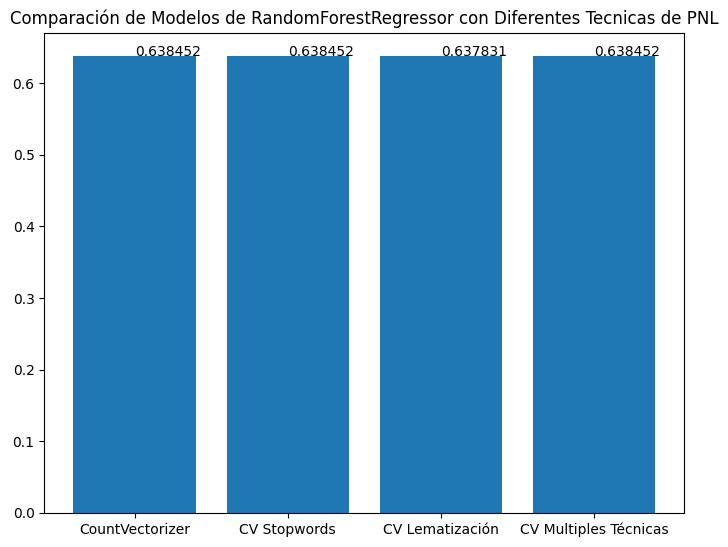

In [23]:
# Celda 5
# Celda 5
# Comparación y análisis de resultados de los modelos.

import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de Modelos de RandomForestRegressor con Diferentes Tecnicas de PNL")
ejeX = ['CountVectorizer','CV Stopwords','CV Lematización','CV Multiples Técnicas']
ejeY = [round(accuracy1,6), round(accuracy2,6),round(accuracy3,6),round(accuracy4,6)]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()


En general los modelos evaluados presentan métricas de desempeño similares, el modelo con el menor desempeño tiene una exactitud más baja en comparación con los otros modelos. En este caso es el **CV Lematización** con un valor de accuracy de **0.637831**, esto indica que su capacidad para predecir el sentimiento de los tweets puede ser menos precisa, ya que este modelo no utilizó técnicas de preprocesamiento como eliminación de stopwords, podría estar operando con características menos refinadas y, por lo tanto, puede ser más sensible al ruido o menos capaz de capturar las relaciones en los datos de texto.

Los demás modelos presentan métricas muy parecidas, pero sin lugar a duda el que tiene mejor desempeño es el modelo **CV Multiples Técnicas** con un valor de accuracy de **0.0.638452**, esto significa que es capaz de predecir con mayor precisión el sentimiento de los tweets en el conjunto de prueba, esto debido a las ventajas de las técnicas de procesamiento de texto utilizadas. 

El uso de CountVectorizer permite convertir los textos en características numéricas, lo que es fundamental para alimentar los datos al modelo de Random Forest. Al eliminar las stopwords, se eliminan palabras comunes que no aportan mucho valor predictivo y pueden reducir el ruido en los datos de entrenamiento. La lematización de los verbos puede ayudar a reducir la variabilidad en las formas verbales, lo que puede mejorar la generalización del modelo.
